## Khushi Prasad 102183044
## Divyam Jain  102003501
### 3CO20
#### Machine Learning Project

### Importing Basic Python Packages

- `Numpy` is a library used for working with arrays.
- `Pandas` is a library that is used for analyzing data.
- `Matplotlib` is a python library used for plotting graphs with the help of other libraries like Numpy and Pandas.
- `Seaborn` is a superset of Matplotlib. It is used for plotting graphs with the help of Matplotlib, Numpy and Pandas.
- `SMOTE` stands for Synthetic Minority Oversampling Technique. It solves the problem of imbalanced data by adding random data to increase the number of minority classes.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import numpy as np
%matplotlib inline

### Uploading the Red Wine Quality csv file

- The Red Wine Quality csv file has been downloaded from Kaggle website.

In [2]:
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
len(df.axes[0])

1599

In [4]:
len(df.axes[1])

12

- The data frame has 12 columns and 1599 rows.

### Classifying the Quality of Wine as Good, Mid or Bad

In [5]:
quality = df["quality"].values
category = []
for num in quality:
    if num<5:
        category.append("Bad")
    elif num>6:
        category.append("Good")
    else:
        category.append("Mid")

### Creating New Data Frame

In [6]:
category = pd.DataFrame(data=category, columns=["category"])
data = pd.concat([df,category],axis=1)
data.drop(columns="quality",axis=1,inplace=True)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Mid
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Mid
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Mid
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Mid
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Mid


## Exploratory Data Analysis -
Exploring the data by counting the number of each class and finding the correlation among the columns.

- `value_counts()` function returns object containing counts of unique values.

In [7]:
data["category"].value_counts()

Mid     1319
Good     217
Bad       63
Name: category, dtype: int64

- `countplot()` method is used to show the count of observations in each categorical bin using bars.

<AxesSubplot:xlabel='category', ylabel='count'>

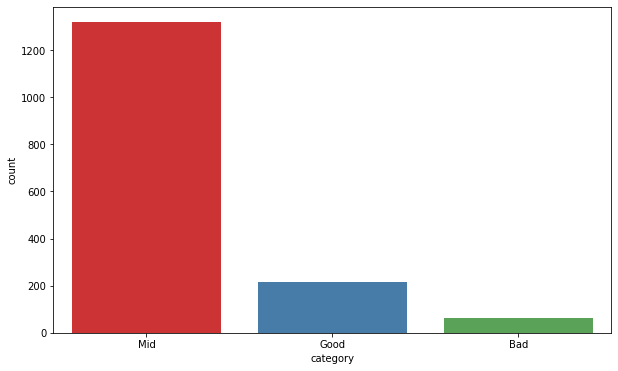

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(x=data["category"],palette="Set1")

- A `heatmap` is a 2D graphical representation of data where the individual values that are contained in a matrix are represented as colours.
- Heatmaps are used to show relationships between two variables, one plotted on each axis.
- In this case we are plotting the `correlation` between each feature.

<AxesSubplot:>

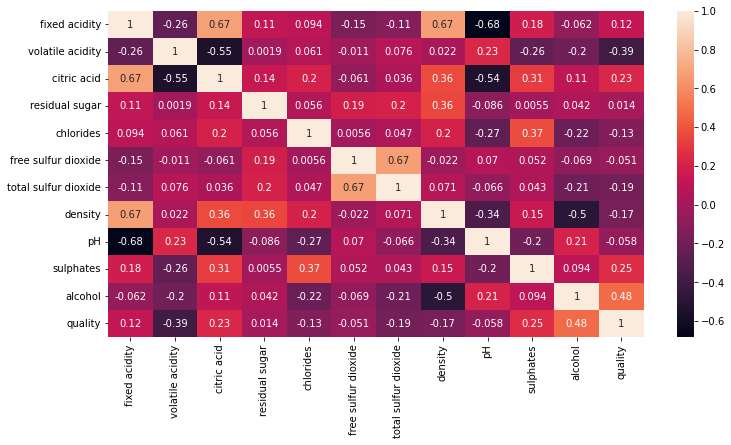

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

- According to the `heatmap`, we can focus on alcohol-quality (0.48) and density-alcohol (-0.5) correlations to get meaningful exploration.
- A `bar plot` represents an estimate of central tendency for a numeric variable with the height of each rectangle.
- Here, we have created a barplot for the alcohol content present in each quality (3-8) of red wine.

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

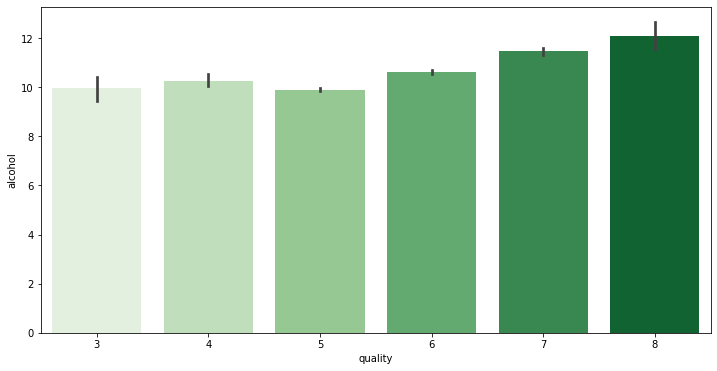

In [10]:
plt.figure(figsize=(12,6))
sns.barplot(x=df["quality"],y=df["alcohol"],palette="Greens")

- A `jointplot` is seaborn's method of displaying a bivariate relationship at the same time as a univariate profile.
- Here, we have shown the jointplot for density of each amount of alcohol content.

<Figure size 864x432 with 0 Axes>

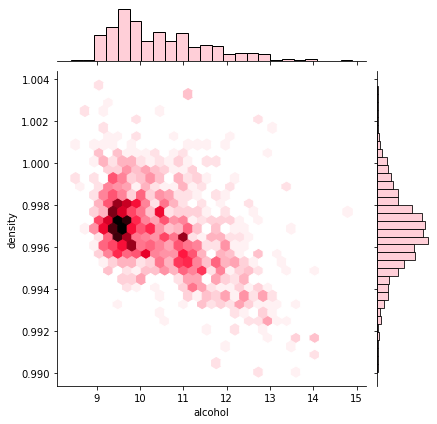

In [11]:
plt.figure(figsize=(12,6))
sns.jointplot(y=df["density"],x=df["alcohol"],kind="hex",color='pink')

### Setting features, labels and Encoding the categorical data

- X contains all the rows and all the columns except the last column i.e. `category` column from the data frame `data`.
- y contains all the rows and the last column i.e. `category` column from the data frame `data`.

In [7]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

- LabelEncoder encodes the target labels with value between 0 and n_classes-1.
- Here, we have encoded the `category` column with numerical values ranging from 0-2 (as there are 3 classes - Bad, Good, Mid).
- `fit_transform` function performs the calculation i.e. label encoding over here and then transforms the values for that column.

In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

### Balancing the dataset

- `SMOTE` stands for Synthetic Minority Oversampling Technique. 
- It aims to balance class distribution by randomly increasing minority class examples by replicating them.

In [9]:
sample = SMOTE()
X, y = sample.fit_resample(X,y)

<AxesSubplot:ylabel='count'>

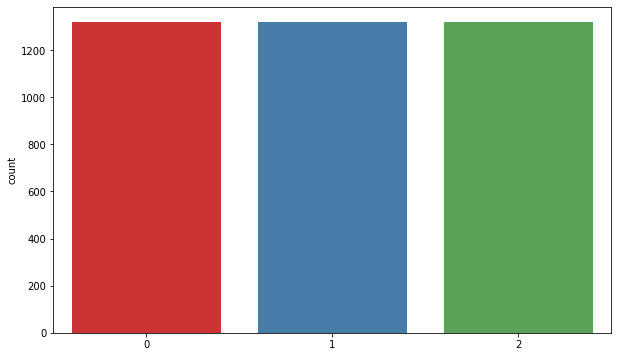

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(x=y,palette="Set1")

## Training and Testing the Data

- `train_test_split` package splits the data into training and testing set.
- We have split the dataset in a 80:20 ratio i.e. the training size has 80% of the data and testing set has the 20% of data.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

- `StandardScaler` subtracts the mean and scales each feature/variable to unit variance i.e. divides by the standard deviation.

In [12]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Random Forest

- Classification Report gives us the Precision, Recall, F1-Score and the Support for the Model used to train the data.
    - `Precision` is defined as the ratio of true positives to the sum of true and false positives.
    - `Recall` is defined as the ratio of true positives to the sum of true positives and false negatives.
    - `F1` is the weighted harmonic mean of precision and recall.
    - `Support` is the number of actual occurrences of the class in the dataset.

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rfc = RandomForestClassifier(n_estimators=250)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       244
           1       0.89      0.98      0.93       259
           2       0.97      0.87      0.92       289

    accuracy                           0.94       792
   macro avg       0.94      0.94      0.94       792
weighted avg       0.94      0.94      0.94       792



### Support Vector Machine

In [14]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
pred_svc = svc.predict(X_test)
print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       244
           1       0.83      0.91      0.87       259
           2       0.87      0.69      0.77       289

    accuracy                           0.84       792
   macro avg       0.84      0.85      0.84       792
weighted avg       0.85      0.84      0.84       792



### K-Nearest Neighbours (KNN)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       244
           1       0.81      0.99      0.89       259
           2       0.98      0.64      0.77       289

    accuracy                           0.86       792
   macro avg       0.88      0.87      0.86       792
weighted avg       0.88      0.86      0.85       792



### K-Nearest Neigbours(KNN) using GridSearchCV

- `GridSearchCV` is a technique for finding the optimal parameter values from a given set of parameters in a grid.

In [16]:
from sklearn.model_selection import GridSearchCV

In [21]:
k_range = list(range(1, 31))
print(k_range)
param_grid = {'n_neighbors': k_range, 'weights': ['uniform','distance'], 'metric': ['euclidean','manhattan']}
print(param_grid)
grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(X_train, y_train)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [23]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9181647566186161
{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
KNeighborsClassifier(metric='manhattan', n_neighbors=1)


In [19]:
pred_knn2 = grid.predict(X_test)
print(classification_report(y_test, pred_knn2))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       244
           1       0.87      1.00      0.93       259
           2       0.99      0.81      0.89       289

    accuracy                           0.93       792
   macro avg       0.93      0.93      0.93       792
weighted avg       0.93      0.93      0.93       792



## Conclusion

In [24]:
from sklearn.metrics import accuracy_score
conclusion = pd.DataFrame({'Models': ["Random Forest","SVC","KNN","KNN Using GridSearchCV"],
                           'Accuracies': [accuracy_score(y_test,pred_rfc)*100,accuracy_score(y_test,pred_svc)*100,accuracy_score(y_test,pred_knn)*100,accuracy_score(y_test,pred_knn2)*100]})
conclusion.sort_values('Accuracies', ascending=False)

,Models,Accuracies
0,Random Forest,94.065657
3,KNN Using GridSearchCV,92.803030
2,KNN,86.237374
1,SVC,84.217172


`Here we can clearly see from the table that the Random Forest Algorithm is the most accurate with an accuracy of 94%.`